#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

In [1]:
"""This is my Jupyter Notebook for LSE - Career Accelerator Data Analytics
Course 2 Assignment"""

'This is my Jupyter Notebook for LSE - Career Accelerator Data Analytics\nCourse 2 Assignment'

## Student Note
This template can be used to better understand the suggested workflow and how to approach the questions. You are welcome to add code and markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]`
- You should submit a zipped folder containing all the elements used in your notebook (data files, images, etc)

## 0) Environment preparation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change setting to any value to print any columns/rows of the DataFrame.
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)

# Load the data sets that will be working with:
covid_19_cases = pd.read_csv("covid_19_uk_cases.csv")
covid_19_vaccinated = pd.read_csv("covid_19_uk_vaccinated.csv")
global_data = pd.read_csv("global_data.csv")
tweets = pd.read_csv("tweets.csv")
tweets_2 = pd.read_csv("tweets_2.csv")

## 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

### 1.1) Report/notebook expectations:
- Demonstrate your GitHub setup consisting of the load and push updates of all the Jupyter Notebook files. (**Hint**: Make sure that your github username, the directory structure and updates are visible in the screenshot. Make sure to provide a zipped copy of the folder containing your submission notebook as well as supporting files such as images used in the notebook.)

### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as Github can be used to add value to organisations.

#### Required: Report submission:
Insert URL to your public GitHub repository and a screenshot (double click cell to edit)
- [My Github Repo](https://github.com/rrrichardz/LSE_DA_Assignemnt_COVID_analysis)

!['My Github screenshot](GitHubScreenshot.png)

## 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

#### Covid_19_cases DataFrame

In [4]:
# View DataFrame.
covid_19_cases

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [6]:
# Explore data set.
print(covid_19_cases.dtypes)
print(covid_19_cases.shape)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
(7584, 12)


#### Covid_19_vaccinated DataFrame

In [6]:
# View DataFrame.
covid_19_vaccinated

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,0,0,0


In [7]:
# Explore data set.
print(covid_19_vaccinated.dtypes)
print(covid_19_vaccinated.shape)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
(7584, 11)


#### Global_data DataFrame

In [8]:
# View DataFrame.
global_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,...,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,...,155448,155466,155508,155540,155599,155627,155682
1,NaN,Albania,41.153300,20.168300,0,0,0,...,174168,174643,174968,175163,175664,176172,176667
2,NaN,Algeria,28.033900,1.659600,0,0,0,...,204388,204490,204597,204695,204790,204900,205005
3,NaN,Andorra,42.506300,1.521800,0,0,0,...,15291,15291,15291,15307,15307,15314,15326
4,NaN,Angola,-11.202700,17.873900,0,0,0,...,61023,61245,61378,61580,61794,62143,62385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,...,831643,836134,839662,843281,846230,849691,853842
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,...,441882,441882,441882,443766,444729,445538,446294
276,NaN,Yemen,15.552727,48.516388,0,0,0,...,9333,9345,9369,9402,9412,9439,9467
277,NaN,Zambia,-13.133897,27.849332,0,0,0,...,209315,209336,209347,209353,209396,209411,209431


In [8]:
# Explore data set.
print(global_data.dtypes)
print(global_data.shape)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
10/10/21            int64
10/11/21            int64
10/12/21            int64
10/13/21            int64
10/14/21            int64
Length: 636, dtype: object
(279, 636)


#### Tweets DataFrame

In [10]:
# View DataFrame.
tweets

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,...,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,0,Sun Mar 13 22:37:31 +0000 2022,1503138212692344832,1503138212692344832,RT @SixandLaura: Detection of a Novel &amp; Hi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",...,False,en,NaN,NaN,NaN,NaN,NaN
1,1,Sun Mar 13 22:36:52 +0000 2022,1503138051052253190,1503138051052253190,"RT @IranNewsUpdate1: #IranProtests\n#Tehran, #...",False,"{'hashtags': [{'text': 'IranProtests', 'indice...",...,False,en,NaN,NaN,NaN,NaN,NaN
2,2,Sun Mar 13 22:35:43 +0000 2022,1503137759002693634,1503137759002693634,Former President Barack #Obama has tested #pos...,True,"{'hashtags': [{'text': 'Obama', 'indices': [24...",...,False,en,False,NaN,NaN,NaN,NaN
3,3,Sun Mar 13 22:34:54 +0000 2022,1503137553632923655,1503137553632923655,RT @OldPrague: - China put all 17 million resi...,False,"{'hashtags': [{'text': 'Schengen', 'indices': ...",...,False,en,NaN,NaN,NaN,NaN,NaN
4,4,Sun Mar 13 22:32:24 +0000 2022,1503136923585589253,1503136923585589253,RT @butterygoods: Sub variant of Omicron BA.2 ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",...,False,en,NaN,NaN,NaN,NaN,NaN
5,5,Sun Mar 13 22:32:21 +0000 2022,1503136912403480580,1503136912403480580,Available #vaccines have been designed against...,True,"{'hashtags': [{'text': 'vaccines', 'indices': ...",...,False,en,False,1.503109e+18,1.503109e+18,{'created_at': 'Sun Mar 13 20:41:42 +0000 2022...,NaN
6,6,Sun Mar 13 22:31:17 +0000 2022,1503136644622438411,1503136644622438411,#fact : The CIA has warned the White House sin...,True,"{'hashtags': [{'text': 'fact', 'indices': [0, ...",...,False,en,False,NaN,NaN,NaN,NaN
7,7,Sun Mar 13 22:30:33 +0000 2022,1503136457807912963,1503136457807912963,RT @CynthiaY29: 6.04 Million people worldwide ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",...,False,en,NaN,NaN,NaN,NaN,NaN
8,8,Sun Mar 13 22:30:21 +0000 2022,1503136409548431361,1503136409548431361,New COVID-19 Data at 2022-03-13 06:30:00 pm ED...,False,"{'hashtags': [{'text': 'Coronavirus', 'indices...",...,False,en,False,NaN,NaN,NaN,"{'media': [{'id': 1503136323812667392, 'id_str..."
9,9,Sun Mar 13 22:30:04 +0000 2022,1503136336378839050,1503136336378839050,#cabletv taking an expensive gamble with ALL-W...,False,"{'hashtags': [{'text': 'cabletv', 'indices': [...",...,False,en,NaN,NaN,NaN,NaN,NaN


In [9]:
# Explore data set.
print(tweets.dtypes)
print(tweets.shape)

Unnamed: 0                int64
created_at               object
id                        int64
id_str                    int64
text                     object
                         ...   
possibly_sensitive       object
quoted_status_id        float64
quoted_status_id_str    float64
quoted_status            object
extended_entities        object
Length: 31, dtype: object
(15, 31)


#### Tweets_2 DataFrame

In [12]:
# View DataFrame.
tweets_2

,created_at,id,id_str,text,truncated,entities,metadata,...,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN
2,Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN
3,Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fri Mar 18 11:43:35 +0000 2022,1504785582656008202,1504785582656008202,#CovidIsNotOver #COVID19 #coronavirus #Omicron...,True,"{'hashtags': [{'text': 'CovidIsNotOver', 'indi...","{'iso_language_code': 'und', 'result_type': 'r...",...,False,und,False,1.504715e+18,1.504715e+18,{'created_at': 'Fri Mar 18 07:03:00 +0000 2022...,NaN
96,Fri Mar 18 11:32:16 +0000 2022,1504782734924918830,1504782734924918830,"The sun is shining. The doors are open, it’s n...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
97,Fri Mar 18 11:31:50 +0000 2022,1504782625491333123,1504782625491333123,@joeldommett @ZoeTheBall @kylieminogue so all...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
98,Fri Mar 18 11:20:59 +0000 2022,1504779896786243585,1504779896786243585,#COVID19 was mentioned on the death certificat...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN


In [10]:
# Explore data set.
print(tweets_2.dtypes)
print(tweets_2.shape)

created_at               object
id                        int64
id_str                    int64
text                     object
truncated                  bool
                         ...   
possibly_sensitive       object
quoted_status_id        float64
quoted_status_id_str    float64
quoted_status            object
extended_entities        object
Length: 29, dtype: object
(100, 29)


#### Number of missing values

In [14]:
# Covid_19_cases number of missing values.
print(covid_19_cases.isnull().sum())

# Covid_19_vaccinated number of missing values.
print(covid_19_vaccinated.isnull().sum())

# Global_data number of missing values.
print(global_data.isnull().sum())

# Tweets number of missing values.
print(tweets.isnull().sum())

# Tweets_2 number of missing values.
print(tweets_2.isnull().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64
Province/State    192
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
10/10/21            0
10/11/21            0
10/12/21            0
10/13/21            0
10/14/21            0
Length: 636, dtype: int64
Unnamed: 0      

#### Filtering Gibraltar

In [15]:
# Subset 'Gibraltar' from DataFrame.
Gibraltar = covid_19_cases[covid_19_cases['Province/State'] == 'Gibraltar']

Gibraltar

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0


#### View Gibraltar (whole)

In [16]:
# Print the whole DataFrame pd.set_option("display.max_rows", None).
Gibraltar

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0


#### Subsetting Gibraltar

In [17]:
# Subset Gibraltar DataFrame.
Gibraltar_subset = Gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]

print(Gibraltar_subset.describe())

           Deaths        Cases    Recovered  Hospitalised
count  632.000000   632.000000   632.000000    632.000000
mean    40.208861  2237.109177  1512.821203   1027.625000
std     45.332832  2136.268090  1817.096755   1145.681058
min      0.000000     0.000000     0.000000      0.000000
25%      0.000000   177.000000   109.500000    157.750000
50%      5.000000  1036.500000   323.500000    675.500000
75%     94.000000  4286.000000  4122.500000   1548.000000
max     97.000000  5727.000000  4670.000000   4907.000000


In [18]:
# Determine null values.
print(Gibraltar.isnull().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64


## 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Assignment 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis

### Merge the two DataFrame

In [19]:
# Determine the two DataFrame to be merged.
print(covid_19_cases.shape)

print(covid_19_vaccinated.shape)

(7584, 12)
(7584, 11)


In [28]:
# Merge two DataFrame covid_19_cases and covid_19_vaccinated.
covid_19_uk = pd.merge(covid_19_cases, covid_19_vaccinated, how = 'inner')

print(covid_19_uk.shape)

(7584, 15)


In [21]:
# Determine the column names and data types.
print(covid_19_uk.columns)
print(covid_19_uk.dtypes)

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [22]:
# Convert the data type of the 'Date' column from object to DateTime.
covid_19_uk['Date'] = pd.to_datetime(covid_19_uk['Date'])

print(covid_19_uk.dtypes)

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object


In [6]:
# Pivoting the DataFrame to show only useful columns.
covid_19_uk_final = covid_19_uk.pivot(index = 'Date', columns = 'Province/State', 
                  values = ['Deaths', 'Cases', 'Recovered', \
'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'])

covid_19_uk_final

Deaths                                                \
Province/State Anguilla Bermuda British Virgin Islands Cayman Islands   
Date                                                                    
2020-01-22          0.0     0.0                    0.0            0.0   
2020-01-23          0.0     0.0                    0.0            0.0   
2020-01-24          0.0     0.0                    0.0            0.0   
2020-01-25          0.0     0.0                    0.0            0.0   
2020-01-26          0.0     0.0                    0.0            0.0   
...                 ...     ...                    ...            ...   
2021-10-10          1.0    89.0                   37.0            2.0   
2021-10-11          1.0    89.0                   37.0            2.0   
2021-10-12          1.0    92.0                   37.0            2.0   
2021-10-13          1.0    92.0                   37.0            2.0   
2021-10-14          1.0    95.0                   37.0            2.0   

                                                                      ...  \
Province/State Channel Islands Falkland Islands (Malvinas) Gibraltar  ...   
Date                                                                  ...   
2020-01-22                 0.0                         0.0       0.0  ...   
2020-01-23                 0.0                         0.0       0.0  ...   
2020-01-24                 0.0                         0.0       0.0  ...   
2020-01-25                 0.0                         0.0       0.0  ...   
2020-01-26                 0.0                         0.0       0.0  ...   
...                        ...                         ...       ...  ...   
2021-10-10               100.0                         0.0      97.0  ...   
2021-10-11               100.0                         0.0      97.0  ...   
2021-10-12               100.0                         0.0      97.0  ...   
2021-10-13               100.0                         0.0      97.0  ...   
2021-10-14               100.0                         0.0      97.0  ...   

                               Second Dose                                   \
Province/State Falkland Islands (Malvinas) Gibraltar Isle of Man Montserrat   
Date                                                                          
2020-01-22                             0.0       0.0         0.0        0.0   
2020-01-23                             0.0       0.0         0.0        0.0   
2020-01-24                             0.0       0.0         0.0        0.0   
2020-01-25                             0.0       0.0         0.0        0.0   
2020-01-26                             0.0       0.0         0.0        0.0   
...                                    ...       ...         ...        ...   
2021-10-10                          1556.0    2431.0      1751.0     2237.0   
2021-10-11                          1891.0    2954.0      2127.0     2718.0   
2021-10-12                          2156.0    3368.0      2425.0     3099.0   
2021-10-13                             0.0       0.0         0.0        0.0   
2021-10-14                             0.0       0.0         0.0        0.0   

                                                                     \
Province/State  Others Saint Helena, Ascension and Tristan da Cunha   
Date                                                                  
2020-01-22         0.0                                          0.0   
2020-01-23         0.0                                          0.0   
2020-01-24         0.0                                          0.0   
2020-01-25         0.0                                          0.0   
2020-01-26         0.0                                          0.0   
...                ...                                          ...   
2021-10-10      1070.0                                        973.0   
2021-10-11      1300.0                                       1182.0   
2021-10-12      1482.0     

In [7]:
# Determine the number of cases across the UK.
covid_19_uk.pivot(index = 'Date', columns = 'Province/State', values = 'Cases').max()

# To ignore scientific notation:
# pd.set_option('display.float_format', lambda x: '%.1f' % x)

# to reset back to default:
# pd.reset_option('display.float_format', silent=True)

Province/State
Anguilla                                            644.0
Bermuda                                            5548.0
British Virgin Islands                             2725.0
Cayman Islands                                     1011.0
Channel Islands                                   12135.0
Falkland Islands (Malvinas)                          69.0
Gibraltar                                          5727.0
Isle of Man                                        8343.0
Montserrat                                           41.0
Others                                          8317439.0
Saint Helena, Ascension and Tristan da Cunha          4.0
Turks and Caicos Islands                           2910.0
dtype: float64

### Using pivot function for aggregation within the DataFrame

In [25]:
# Determine the biggest group of people across the UK 
# who have received a first dose but not a second dose
# and use pivot table to do the math :).
table_1 = covid_19_uk.pivot(index = 'Date', columns = 'Province/State', 
                  values = ['First Dose', 'Second Dose']).sum()

print(table_1)

table_2 = table_1['First Dose'] - table_1['Second Dose']

print(table_2.sort_values(ascending = False))

             Province/State                              
First Dose   Anguilla                                        4931470
             Bermuda                                         2817981
             British Virgin Islands                          5166303
             Cayman Islands                                  3522476
             Channel Islands                                 3287646
                                                              ...   
Second Dose  Isle of Man                                     4036345
             Montserrat                                      5157560
             Others                                          2466669
             Saint Helena, Ascension and Tristan da Cunha    2242421
             Turks and Caicos Islands                        2915136
Length: 24, dtype: int64
Province/State
Gibraltar                                       264745
Montserrat                                      243568
British Virgin Islands           

In [26]:
# Calculate the percentage.
table_3 = (table_1['First Dose'] - table_1['Second Dose']) * 100 / table_1['First Dose']

print(table_3.sort_values(ascending = False))

Province/State
Turks and Caicos Islands                        4.510122
Isle of Man                                     4.510048
Anguilla                                        4.509771
British Virgin Islands                          4.509763
Cayman Islands                                  4.509669
Channel Islands                                 4.509640
Montserrat                                      4.509577
Falkland Islands (Malvinas)                     4.509560
Gibraltar                                       4.509532
Bermuda                                         4.509363
Others                                          4.509299
Saint Helena, Ascension and Tristan da Cunha    4.509158
dtype: float64


In [27]:
# Changes over time of vaccinated (first dose) and fully vaccinated individuals.
table_4 = covid_19_uk.pivot(index = 'Date', columns = 'Province/State', 
                  values = ['Vaccinated', 'First Dose'])

table_4[(table_4 > 0).all(axis = 1)]

Vaccinated                                                \
Province/State   Anguilla Bermuda British Virgin Islands Cayman Islands   
Date                                                                      
2021-01-11           2181    1246                   2284           1558   
2021-01-12           1687     964                   1767           1205   
2021-01-13           1023     585                   1072            731   
2021-01-14            552     315                    578            394   
2021-01-15            442     252                    463            316   
...                   ...     ...                    ...            ...   
2021-10-08           3052    1744                   3197           2180   
2021-10-09           3515    2009                   3682           2511   
2021-10-10           2042    1167                   2140           1459   
2021-10-11           2481    1418                   2600           1772   
2021-10-12           2829    1617                   2964           2021   

                                                                      ...  \
Province/State Channel Islands Falkland Islands (Malvinas) Gibraltar  ...   
Date                                                                  ...   
2021-01-11                1454                        1661      2596  ...   
2021-01-12                1125                        1285      2008  ...   
2021-01-13                 682                         780      1218  ...   
2021-01-14                 368                         421       657  ...   
2021-01-15                 295                         337       526  ...   
...                        ...                         ...       ...  ...   
2021-10-08                2035                        2325      3634  ...   
2021-10-09                2343                        2678      4185  ...   
2021-10-10                1362                        1556      2431  ...   
2021-10-11                1654                        1891      2954  ...   
2021-10-12                1886                        2156      3368  ...   

                                First Dose                                   \
Province/State Falkland Islands (Malvinas) Gibraltar Isle of Man Montserrat   
Date                                                                          
2021-01-11                           11606     18134       13057      16684   
2021-01-12                           16613     25958       18689      23881   
2021-01-13                           22315     34868       25105      32078   
2021-01-14                           25336     39587       28502      36420   
2021-01-15                           27305     42665       30719      39251   
...                                    ...       ...         ...        ...   
2021-10-08                            2535      3961        2852       3644   
2021-10-09                            2512      3924        2826       3610   
2021-10-10                            1768      2763        1990       2542   
2021-10-11                            2334      3646        2625       3355   
2021-10-12                            2948      4606        3316       4237   

                                                                    \
Province/State Others Saint Helena, Ascension and Tristan da Cunha   
Date                                                                 
2021-01-11       7979                                         7254   
2021-01-12      11421                                        10383   
2021-01-13      15342                                        13947   
2021-01-14      17418                                        15835   
2021-01-15      18772                                        17066   
...               ...                                          ...   
2021-10-08       1743                                         1584   
2021-10-09       1727                                         1570   
2021-10-

## 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?
 
### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

### Communicate the number of individuals who have received a second dose compared to individuals who have received their first dose in each area

In [29]:
# Create barplot to communicate the number of individuals who have received a second
# dose compared to individuals who have received their first dose in each area.

# Group data.
covid_groupby_1 =  covid_19_uk.groupby('Province/State')[['First Dose', 'Second Dose']].sum()

# View and check data.
print(covid_groupby_1.head())
print(covid_groupby_1.columns)
print(covid_groupby_1.dtypes)
print(covid_groupby_1.shape)

                        First Dose  Second Dose
Province/State                                 
Anguilla                   4931470      4709072
Bermuda                    2817981      2690908
British Virgin Islands     5166303      4933315
Cayman Islands             3522476      3363624
Channel Islands            3287646      3139385
Index(['First Dose', 'Second Dose'], dtype='object')
First Dose     int64
Second Dose    int64
dtype: object
(12, 2)


In [30]:
# Calculate the ratio and create a new column for second percentage.
covid_groupby_1['Second Percentage'] = covid_groupby_1['Second Dose'] / covid_groupby_1['First Dose']
covid_percentage_sorted = covid_groupby_1.sort_values('Second Percentage', ascending = False).reset_index()

# Calculate the ratio and create a new column for first percentage.
covid_groupby_1['First Percentage'] = 1 - covid_groupby_1['Second Percentage']
covid_percentage_sorted = covid_groupby_1.sort_values('First Percentage', ascending = False).reset_index()

# Format the two newly added columns.
covid_percentage_sorted[['Second Formatted']] = covid_percentage_sorted[['Second Percentage']].round(6) * 100
covid_percentage_sorted[['First Formatted']] = covid_percentage_sorted[['First Percentage']].round(6) * 100

covid_percentage_sorted

,Province/State,First Dose,Second Dose,Second Percentage,First Percentage,Second Formatted,First Formatted
0,Turks and Caicos Islands,3052822,2915136,0.954899,0.045101,95.4899,4.5101
1,Isle of Man,4226984,4036345,0.954900,0.045100,95.4900,4.5100
2,Anguilla,4931470,4709072,0.954902,0.045098,95.4902,4.5098
3,British Virgin Islands,5166303,4933315,0.954902,0.045098,95.4902,4.5098
4,Cayman Islands,3522476,3363624,0.954903,0.045097,95.4903,4.5097
5,Channel Islands,3287646,3139385,0.954904,0.045096,95.4904,4.5096
6,Montserrat,5401128,5157560,0.954904,0.045096,95.4904,4.5096
7,Falkland Islands (Malvinas),3757307,3587869,0.954904,0.045096,95.4904,4.5096
8,Gibraltar,5870786,5606041,0.954905,0.045095,95.4905,4.5095
9,Bermuda,2817981,2690908,0.954906,0.045094,95.4906,4.5094


In [31]:
# Defining a min and max value for y-axis.
min_value = covid_percentage_sorted['Second Formatted'].min() - 0.0001
max_value = covid_percentage_sorted['Second Formatted'].max() + 0.0001

# Create a range so the countries listed in order.
y_pos = np.arange(12)

<BarContainer object of 12 artists>

(95.4898, 95.4909)

Text(0.5, 0, 'Percentage of People Who Received the Second Dose')

[Text(0, 0, 'Turks and Caicos Islands'),
 Text(0, 1, 'Isle of Man'),
 Text(0, 2, 'Anguilla'),
 Text(0, 3, 'British Virgin Islands'),
 Text(0, 4, 'Cayman Islands'),
 Text(0, 5, 'Channel Islands'),
 Text(0, 6, 'Montserrat'),
 Text(0, 7, 'Falkland Islands (Malvinas)'),
 Text(0, 8, 'Gibraltar'),
 Text(0, 9, 'Bermuda'),
 Text(0, 10, 'Others'),
 Text(0, 11, 'Saint Helena, Ascension and Tristan da Cunha')]

Text(0, 0.5, 'Province/State')

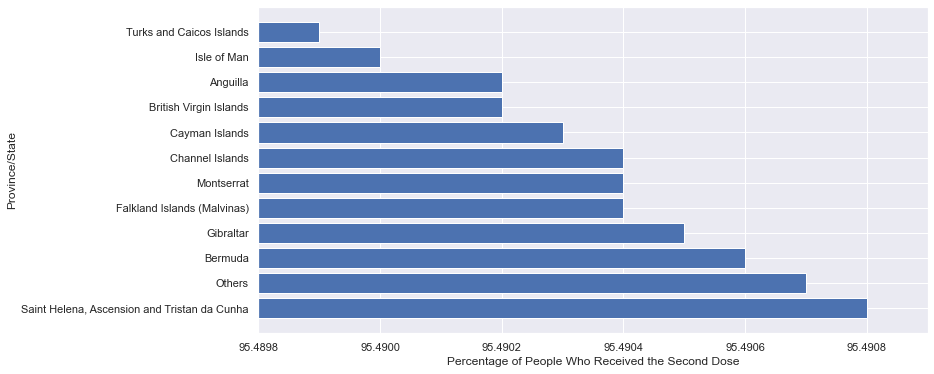

In [36]:
# Create barplot #1.
fig, ax = plt.subplots(figsize = (12, 6))

# Creating a horizontal barplot.
ax.barh(y_pos, covid_percentage_sorted['Second Formatted'], align = 'center')

# Adjust x-axis.
ax.set_xlim([min_value, max_value])
ax.ticklabel_format(style = 'plain', useOffset = False)
ax.set_xlabel('Percentage of People Who Received the Second Dose')

# Adjust y-axis.
ax.invert_yaxis()
ax.set_yticks(y_pos)
ax.set_yticklabels(covid_percentage_sorted['Province/State'])
ax.set_ylabel('Province/State')

plt.show()

# Save visualisation.
# fig.savefig("Percentage_Second_Dose.png", dpi = 100)

In [37]:
# Defining a min and max value for y-axis.
min_value_2 = covid_percentage_sorted['First Formatted'].min() - 0.0001
max_value_2 = covid_percentage_sorted['First Formatted'].max() + 0.0001

# Create a range so the countries listed in order.
y_pos = np.arange(12)

<BarContainer object of 12 artists>

(4.5091, 4.5102)

Text(0.5, 0, 'Percentage of People Who Only Received the First Dose')

[Text(0, 0, 'Turks and Caicos Islands'),
 Text(0, 1, 'Isle of Man'),
 Text(0, 2, 'Anguilla'),
 Text(0, 3, 'British Virgin Islands'),
 Text(0, 4, 'Cayman Islands'),
 Text(0, 5, 'Channel Islands'),
 Text(0, 6, 'Montserrat'),
 Text(0, 7, 'Falkland Islands (Malvinas)'),
 Text(0, 8, 'Gibraltar'),
 Text(0, 9, 'Bermuda'),
 Text(0, 10, 'Others'),
 Text(0, 11, 'Saint Helena, Ascension and Tristan da Cunha')]

Text(0, 0.5, 'Province/State')

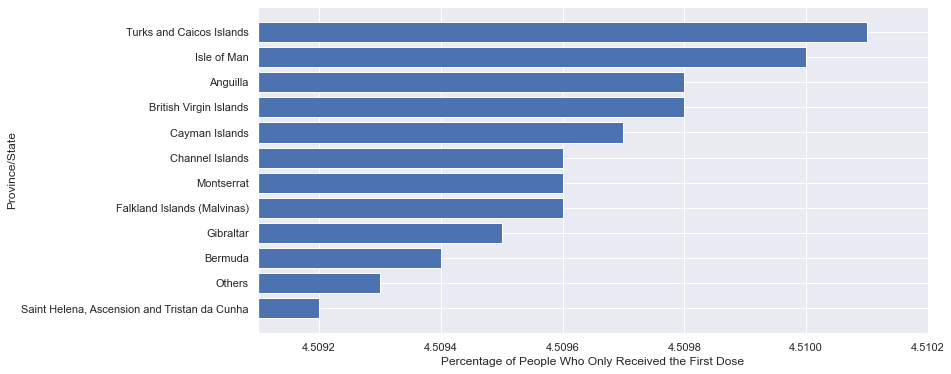

In [38]:
# Create barplot #2.
fig, ax = plt.subplots(figsize = (12, 6))

# Creating a horizontal barplot.
ax.barh(y_pos, covid_percentage_sorted['First Formatted'], align = 'center')

# Adjust x-axis.
ax.set_xlim([min_value_2, max_value_2])
ax.ticklabel_format(style = 'plain', useOffset = False)
ax.set_xlabel('Percentage of People Who Only Received the First Dose')

# Adjust y-axis.
ax.invert_yaxis()
ax.set_yticks(y_pos)
ax.set_yticklabels(covid_percentage_sorted['Province/State'])
ax.set_ylabel('Province/State')

plt.show()

# Save visualisation.
# fig.savefig("Percentage_First_Dose.png", dpi = 100)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'Number of vaccinations (millions)')

Text(0.5, 1.0, 'Number of vaccinations received (First Dose vs Second Dose)')

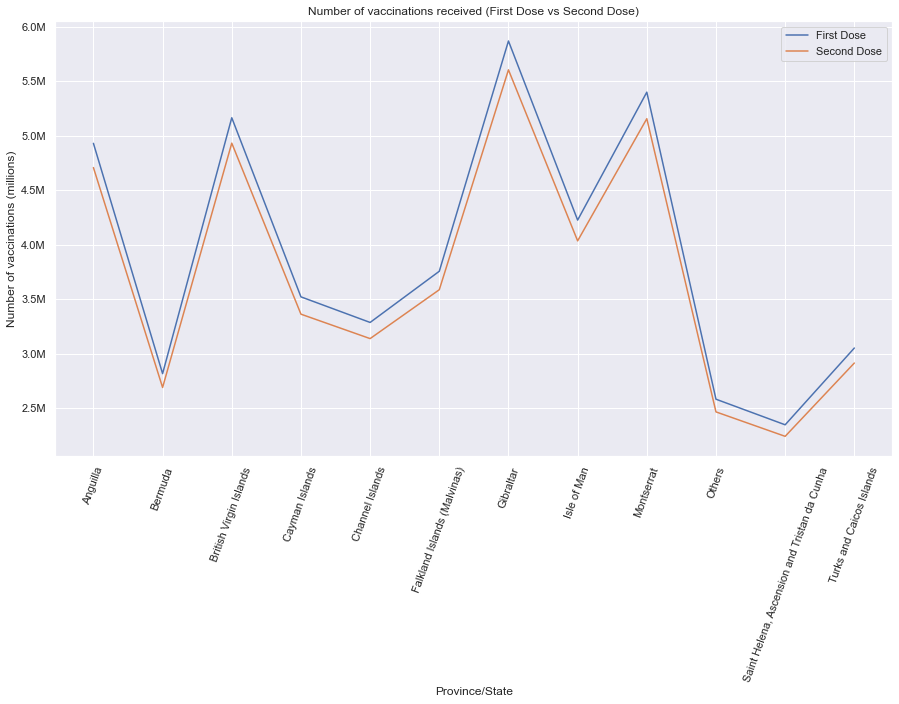

In [39]:
# Create lineplot to communicate the number of individuals who have received a second
# dose compared to individuals who have received their first dose in each area.
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Define a formatter.
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value * 0.000_001)
    return formatter

# Create plot.
ax = sns.lineplot(x = 'Province/State', y = 'First Dose', data = covid_groupby_1, label = 'First Dose')
ax1 = sns.lineplot(x = 'Province/State', y = 'Second Dose', data = covid_groupby_1, label = 'Second Dose')

# Set tick and labels.
ax.yaxis.set_major_formatter(format_number)
plt.xticks(rotation = 70)
ax.set_ylabel('Number of vaccinations (millions)')
ax.set_title('Number of vaccinations received (First Dose vs Second Dose)')
ax.legend()
plt.style.use('ggplot')

# Save visualisaton.
# fig.savefig("Number_of_vaccinations_received.png", dpi = 100, bbox_inches = 'tight')

### Communicate the number of deaths per month in each region

In [40]:
# Group the data.
covid_groupby_2 = covid_19_uk[['Province/State', 'Date', 'Deaths']]

# View and check data.
print(covid_groupby_2)
print(covid_groupby_2.dtypes)
print(covid_groupby_2.columns)
print(covid_groupby_2.shape)

     Province/State        Date    Deaths
0          Anguilla  2020-01-22       0.0
1          Anguilla  2020-01-23       0.0
2          Anguilla  2020-01-24       0.0
3          Anguilla  2020-01-25       0.0
4          Anguilla  2020-01-26       0.0
...             ...         ...       ...
7579         Others  2021-10-10  137735.0
7580         Others  2021-10-11  137763.0
7581         Others  2021-10-12  137944.0
7582         Others  2021-10-13  138080.0
7583         Others  2021-10-14  138237.0

[7584 rows x 3 columns]
Province/State     object
Date               object
Deaths            float64
dtype: object
Index(['Province/State', 'Date', 'Deaths'], dtype='object')
(7584, 3)


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

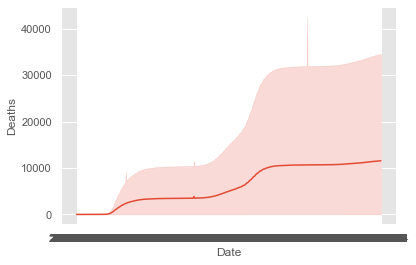

In [41]:
# Create lineplot.
sns.lineplot(x = 'Date', y = 'Deaths', data = covid_groupby_2)

sns.set(rc = {'figure.figsize': (15, 8)})

In [42]:
# Find any outliers.
covid_outlier = covid_groupby_2.groupby('Province/State')[['Deaths']].max()

print(covid_outlier)

                                                Deaths
Province/State                                        
Anguilla                                           1.0
Bermuda                                           95.0
British Virgin Islands                            37.0
Cayman Islands                                     2.0
Channel Islands                                  100.0
Falkland Islands (Malvinas)                        0.0
Gibraltar                                         97.0
Isle of Man                                       54.0
Montserrat                                         1.0
Others                                        138237.0
Saint Helena, Ascension and Tristan da Cunha       1.0
Turks and Caicos Islands                          23.0


In [43]:
# Convert date column into datetime.
covid_groupby_2['Date'] = pd.to_datetime(covid_groupby_2['Date'])

# Convert date into months.
covid_groupby_2['Month'] = covid_groupby_2['Date'].dt.year.astype(str) + "-" + \
covid_groupby_2['Date'].dt.month.astype(str)

covid_groupby_2

,Province/State,Date,Deaths,Month
0,Anguilla,2020-01-22,0.0,2020-1
1,Anguilla,2020-01-23,0.0,2020-1
2,Anguilla,2020-01-24,0.0,2020-1
3,Anguilla,2020-01-25,0.0,2020-1
4,Anguilla,2020-01-26,0.0,2020-1
...,...,...,...,...
7579,Others,2021-10-10,137735.0,2021-10
7580,Others,2021-10-11,137763.0,2021-10
7581,Others,2021-10-12,137944.0,2021-10
7582,Others,2021-10-13,138080.0,2021-10


In [44]:
# Create a subset to filter the data only showing 'Others' rows.
covid_subset = covid_groupby_2[covid_groupby_2['Province/State'] == 'Others']

covid_subset

,Province/State,Date,Deaths,Month
6952,Others,2020-01-22,0.0,2020-1
6953,Others,2020-01-23,0.0,2020-1
6954,Others,2020-01-24,0.0,2020-1
6955,Others,2020-01-25,0.0,2020-1
6956,Others,2020-01-26,0.0,2020-1
...,...,...,...,...
7579,Others,2021-10-10,137735.0,2021-10
7580,Others,2021-10-11,137763.0,2021-10
7581,Others,2021-10-12,137944.0,2021-10
7582,Others,2021-10-13,138080.0,2021-10


In [45]:
# Create a subset to filter the data excluding 'Others' rows.
covid_subset_2 = covid_groupby_2[covid_groupby_2['Province/State'] != 'Others']

covid_subset_2

,Province/State,Date,Deaths,Month
0,Anguilla,2020-01-22,0.0,2020-1
1,Anguilla,2020-01-23,0.0,2020-1
2,Anguilla,2020-01-24,0.0,2020-1
3,Anguilla,2020-01-25,0.0,2020-1
4,Anguilla,2020-01-26,0.0,2020-1
...,...,...,...,...
6947,Turks and Caicos Islands,2021-10-10,23.0,2021-10
6948,Turks and Caicos Islands,2021-10-11,23.0,2021-10
6949,Turks and Caicos Islands,2021-10-12,23.0,2021-10
6950,Turks and Caicos Islands,2021-10-13,23.0,2021-10


Text(0, 0.5, 'Cases of Deaths by Covid_19')

Text(0.5, 1.0, 'Number of Deaths per Month in "Others" region')

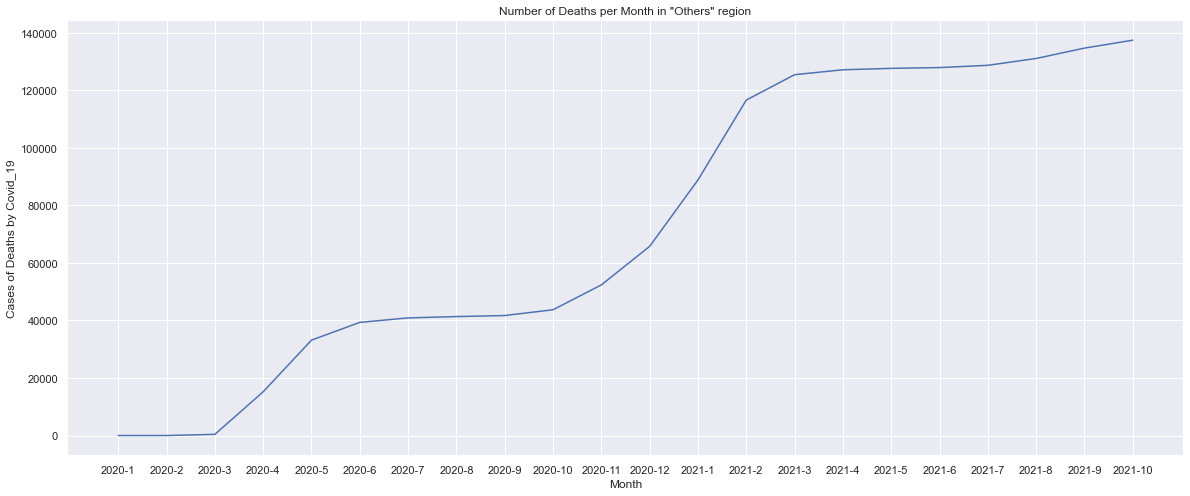

In [46]:
# Create lineplot tp communicate the number of deaths per month in 'Others' region
# and set figure size.
sns.set(rc = {'figure.figsize': (20, 8)})
ax = sns.lineplot(x = 'Month', y = 'Deaths', data = covid_subset, ci = None)

ax.set_ylabel('Cases of Deaths by Covid_19')
ax.set_title('Number of Deaths per Month in "Others" region')

Text(0, 0.5, 'Cases of Deaths by Covid_19')

Text(0.5, 1.0, 'Number of Deaths per Month in regions excluding "Others"')

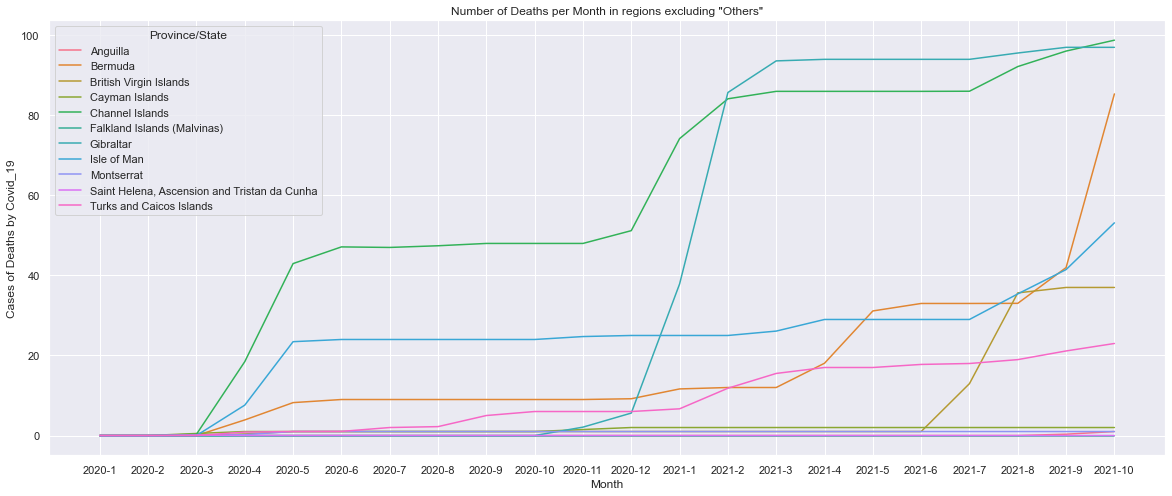

In [47]:
# Create lineplot tp communicate the number of deaths per month in all regions excluding 'Others' region
# and set figure size.
sns.set(rc = {'figure.figsize': (20, 8)})
ax = sns.lineplot(x = 'Month', y = 'Deaths', hue = 'Province/State', data = covid_subset_2, ci = None)

ax.set_ylabel('Cases of Deaths by Covid_19')
ax.set_title('Number of Deaths per Month in regions excluding "Others"')

### Communicate the number of cases per month in each region

In [48]:
# Add number of cases column to DataFrame.
covid_groupby_2['Cases'] = covid_19_uk['Cases']

# View and check the data.
print(covid_groupby_2.head())
print(covid_groupby_2.dtypes)
print(covid_groupby_2.columns)
print(covid_groupby_2.shape)

# Sort the data.
covid_groupby_2.groupby('Province/State')[['Cases']].max().sort_values('Cases', ascending = True)

  Province/State       Date  Deaths   Month  Cases
0       Anguilla 2020-01-22     0.0  2020-1    0.0
1       Anguilla 2020-01-23     0.0  2020-1    0.0
2       Anguilla 2020-01-24     0.0  2020-1    0.0
3       Anguilla 2020-01-25     0.0  2020-1    0.0
4       Anguilla 2020-01-26     0.0  2020-1    0.0
Province/State            object
Date              datetime64[ns]
Deaths                   float64
Month                     object
Cases                    float64
dtype: object
Index(['Province/State', 'Date', 'Deaths', 'Month', 'Cases'], dtype='object')
(7584, 5)


,Cases
Province/State,
"Saint Helena, Ascension and Tristan da Cunha",4.0
Montserrat,41.0
Falkland Islands (Malvinas),69.0
Anguilla,644.0
Cayman Islands,1011.0
British Virgin Islands,2725.0
Turks and Caicos Islands,2910.0
Bermuda,5548.0
Gibraltar,5727.0


In [49]:
# Create a subset to filter the data only showing 'Others' rows.
covid_subset = covid_groupby_2[covid_groupby_2['Province/State'] == 'Others']

covid_subset

,Province/State,Date,Deaths,Month,Cases
6952,Others,2020-01-22,0.0,2020-1,0.0
6953,Others,2020-01-23,0.0,2020-1,0.0
6954,Others,2020-01-24,0.0,2020-1,0.0
6955,Others,2020-01-25,0.0,2020-1,0.0
6956,Others,2020-01-26,0.0,2020-1,0.0
...,...,...,...,...,...
7579,Others,2021-10-10,137735.0,2021-10,8154306.0
7580,Others,2021-10-11,137763.0,2021-10,8193769.0
7581,Others,2021-10-12,137944.0,2021-10,8231437.0
7582,Others,2021-10-13,138080.0,2021-10,8272883.0


In [50]:
# Create a subset to filter the data excluding 'Others' rows.
covid_subset_2 = covid_groupby_2[covid_groupby_2['Province/State'] != 'Others']

covid_subset_2

,Province/State,Date,Deaths,Month,Cases
0,Anguilla,2020-01-22,0.0,2020-1,0.0
1,Anguilla,2020-01-23,0.0,2020-1,0.0
2,Anguilla,2020-01-24,0.0,2020-1,0.0
3,Anguilla,2020-01-25,0.0,2020-1,0.0
4,Anguilla,2020-01-26,0.0,2020-1,0.0
...,...,...,...,...,...
6947,Turks and Caicos Islands,2021-10-10,23.0,2021-10,2898.0
6948,Turks and Caicos Islands,2021-10-11,23.0,2021-10,2898.0
6949,Turks and Caicos Islands,2021-10-12,23.0,2021-10,2898.0
6950,Turks and Caicos Islands,2021-10-13,23.0,2021-10,2905.0


Text(0, 0.5, 'Covid_19 Cases')

Text(0.5, 1.0, 'Number of Cases per Month in "Others" region')

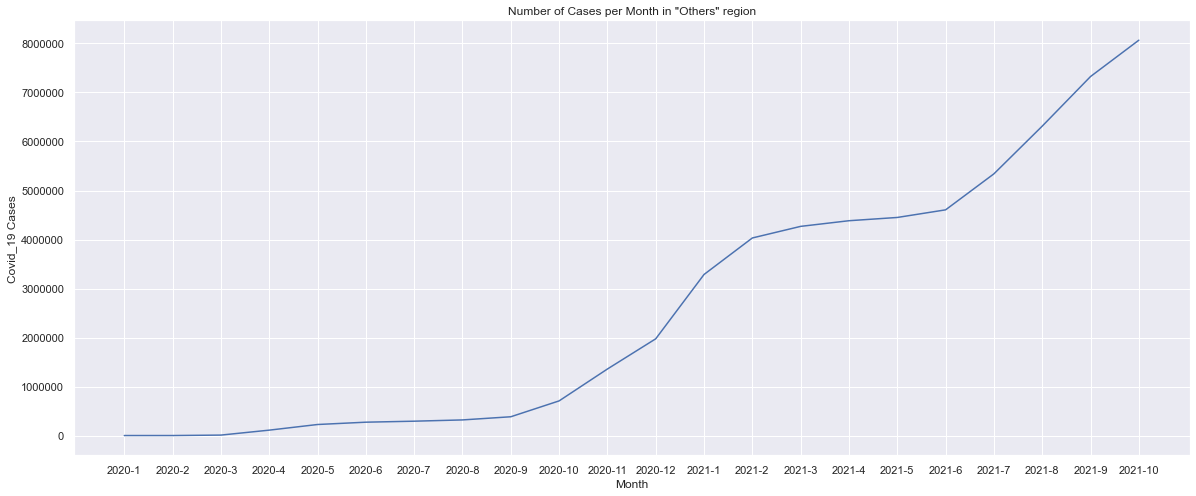

In [51]:
# Create lineplot tp communicate the number of cases per month in 'Others' region
# and set figure size.
sns.set(rc = {'figure.figsize': (20, 8)})
ax = sns.lineplot(x = 'Month', y = 'Cases', data = covid_subset, ci = None)

plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Covid_19 Cases')
ax.set_title('Number of Cases per Month in "Others" region')

Text(0, 0.5, 'Covid_19 Cases')

Text(0.5, 1.0, 'Number of Cases per Month in regions excluding "Others"')

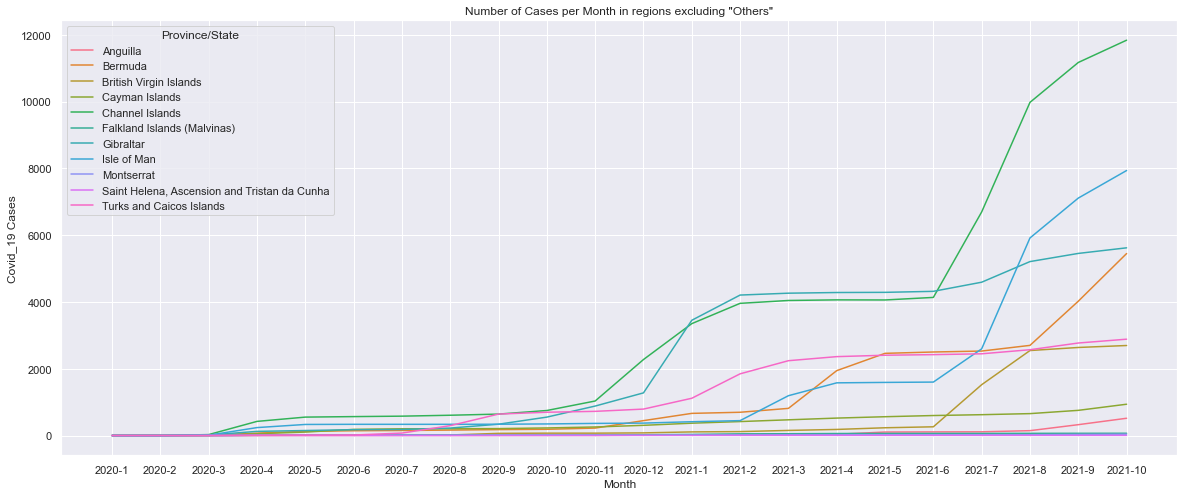

In [52]:
# Create lineplot tp communicate the number of cases per month in 'Others' region
# and set figure size.
sns.set(rc = {'figure.figsize': (20, 8)})
ax = sns.lineplot(x = 'Month', y = 'Cases', hue = 'Province/State', data = covid_subset_2, ci = None)

ax.set_ylabel('Covid_19 Cases')
ax.set_title('Number of Cases per Month in regions excluding "Others"')

### Communicate the number of hospitalised per month in each region

In [53]:
# Add number of hospitalised column to DataFrame.
covid_groupby_2['Hospitalised'] = covid_19_uk['Hospitalised']

# View and check the data.
print(covid_groupby_2.head())
print(covid_groupby_2.dtypes)
print(covid_groupby_2.columns)
print(covid_groupby_2.shape)

# Sort the data.
covid_groupby_2.groupby('Province/State')[['Hospitalised']].max().sort_values('Hospitalised', ascending = True)

  Province/State       Date  Deaths   Month  Cases  Hospitalised
0       Anguilla 2020-01-22     0.0  2020-1    0.0           0.0
1       Anguilla 2020-01-23     0.0  2020-1    0.0           0.0
2       Anguilla 2020-01-24     0.0  2020-1    0.0           0.0
3       Anguilla 2020-01-25     0.0  2020-1    0.0           0.0
4       Anguilla 2020-01-26     0.0  2020-1    0.0           0.0
Province/State            object
Date              datetime64[ns]
Deaths                   float64
Month                     object
Cases                    float64
Hospitalised             float64
dtype: object
Index(['Province/State', 'Date', 'Deaths', 'Month', 'Cases', 'Hospitalised'], dtype='object')
(7584, 6)


,Hospitalised
Province/State,
"Saint Helena, Ascension and Tristan da Cunha",1963.0
Others,2159.0
Bermuda,2355.0
Turks and Caicos Islands,2552.0
Channel Islands,2748.0
Cayman Islands,2944.0
Falkland Islands (Malvinas),3140.0
Isle of Man,3533.0
Anguilla,4122.0


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 0, 'Date (in Months)')

Text(0, 0.5, 'Hospitalised Cases (count)')

Text(0.5, 1.0, 'Number of Hospitalised Cases (per month) from 2020-01 to 2021-10')

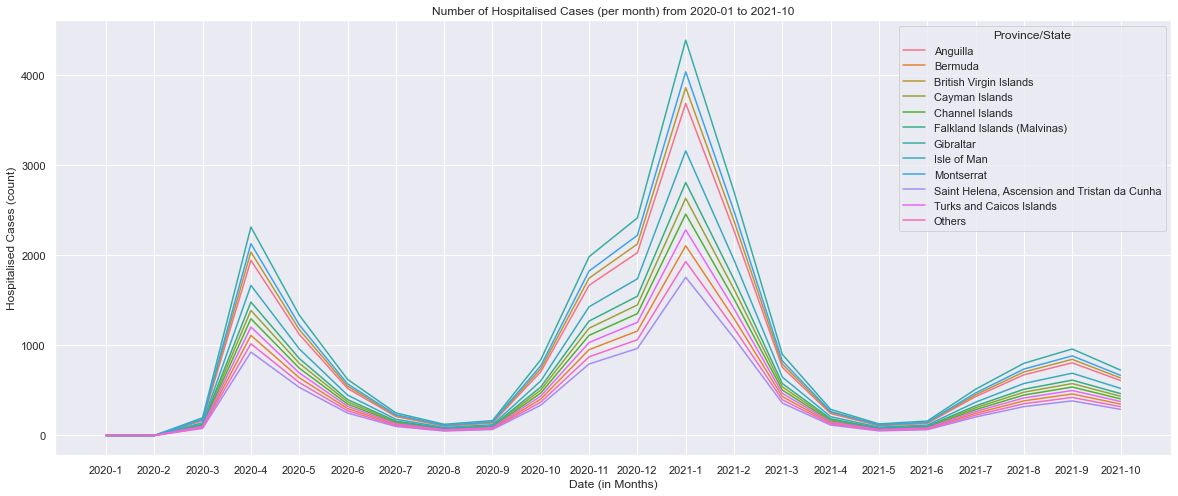

In [54]:
# Create lineplot.
ax = sns.lineplot(x = 'Month', y = 'Hospitalised', hue = 'Province/State',
            data = covid_groupby_2, ci = None)

sns.set(rc = {'figure.figsize': (20, 8)})
sns.color_palette("tab10")
ax.set_xlabel("Date (in Months)")
ax.set_ylabel("Hospitalised Cases (count)")
ax.set_title("Number of Hospitalised Cases (per month) from 2020-01 to 2021-10")

In [ ]:
# Save visualisation.
# fig.savefig("Number_of_hospitalised.png", dpi = 300)

### Identify which region has the greatest number of recoveries

In [55]:
# Group the data.
covid_groupby_3 = covid_19_uk[['Province/State', 'Recovered']]

# View and check the data.
print(covid_groupby_3.head())
print(covid_groupby_3.dtypes)
print(covid_groupby_3.columns)
print(covid_groupby_3.shape)

# Sort the data.
covid_groupby_3.groupby('Province/State')[['Recovered']].max().sort_values('Recovered', ascending = True)

  Province/State  Recovered
0       Anguilla        0.0
1       Anguilla        0.0
2       Anguilla        0.0
3       Anguilla        0.0
4       Anguilla        0.0
Province/State     object
Recovered         float64
dtype: object
Index(['Province/State', 'Recovered'], dtype='object')
(7584, 2)


,Recovered
Province/State,
"Saint Helena, Ascension and Tristan da Cunha",4.0
Montserrat,19.0
Falkland Islands (Malvinas),63.0
Anguilla,111.0
Others,344.0
Cayman Islands,635.0
British Virgin Islands,1914.0
Turks and Caicos Islands,2433.0
Bermuda,2503.0


In [56]:
# Convert date column into datetime.
covid_19_uk['Date'] = pd.to_datetime(covid_19_uk['Date'])

# Convert date into months and add column to DataFrame.
covid_groupby_3['Month'] = covid_19_uk['Date'].dt.year.astype(str) + "-" + \
covid_19_uk['Date'].dt.month.astype(str)

# View DataFrame.
covid_groupby_3

,Province/State,Recovered,Month
0,Anguilla,0.0,2020-1
1,Anguilla,0.0,2020-1
2,Anguilla,0.0,2020-1
3,Anguilla,0.0,2020-1
4,Anguilla,0.0,2020-1
...,...,...,...
7579,Others,0.0,2021-10
7580,Others,0.0,2021-10
7581,Others,0.0,2021-10
7582,Others,0.0,2021-10


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 0, 'Date (in Months)')

Text(0, 0.5, 'Recovered Cases (count)')

Text(0.5, 1.0, 'Number of Recovered Cases from 2020-01 to 2021-10')

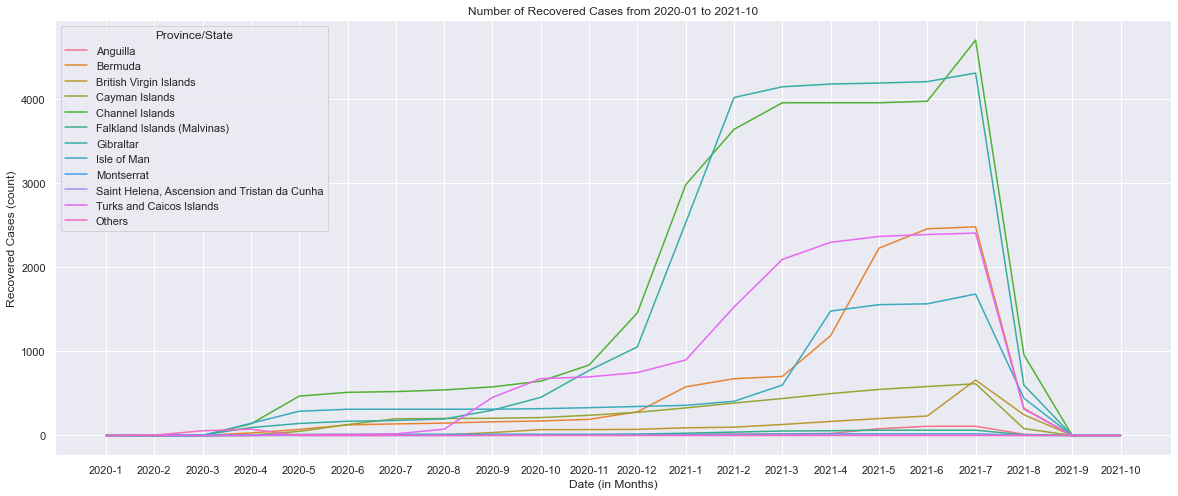

In [57]:
# Create lineplot.
ax = sns.lineplot(x = 'Month', y = 'Recovered', hue = 'Province/State',
            data = covid_groupby_3, ci = None)

sns.set(rc = {'figure.figsize': (20, 8)})
sns.color_palette("tab10")
ax.set_xlabel("Date (in Months)")
ax.set_ylabel("Recovered Cases (count)")
ax.set_title("Number of Recovered Cases from 2020-01 to 2021-10")

In [ ]:
# Save visualisation.
fig.savefig("Number_of_recovered.png", dpi = 300)

## 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

In [97]:
# Explore tweets_2 data set.
print(tweets_2.info())
print(tweets_2.shape)
tweets_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 100 non-null    object 
 1   id                         100 non-null    int64  
 2   id_str                     100 non-null    int64  
 3   text                       100 non-null    object 
 4   truncated                  100 non-null    bool   
 5   entities                   100 non-null    object 
 6   metadata                   100 non-null    object 
 7   source                     100 non-null    object 
 8   in_reply_to_status_id      8 non-null      float64
 9   in_reply_to_status_id_str  8 non-null      float64
 10  in_reply_to_user_id        11 non-null     float64
 11  in_reply_to_user_id_str    11 non-null     float64
 12  in_reply_to_screen_name    11 non-null     object 
 13  user                       100 non-null    object 


,created_at,id,id_str,text,truncated,entities,metadata,...,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN
2,Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN
3,Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,False,NaN,NaN,NaN,NaN


In [4]:
# Exploring potential elemetns of interest for tweets_2.
tweets_count = tweets_2[['retweet_count', 'favorite_count']]

print(tweets_count.sort_values('retweet_count', ascending = False))

tweets_count.sort_values('favorite_count', ascending = False)

# Tweet with index number 6 is of interest.
print(tweets_2.filter(items = [6], axis = 0))

    retweet_count  favorite_count
6              32              75
73             17              32
22              8               9
9               5              20
1               4               3
..            ...             ...
60              0               4
19              0               0
62              0               6
18              0               0
0               0               0

[100 rows x 2 columns]
                       created_at                   id               id_str  \
6  Mon Mar 21 16:46:01 +0000 2022  1505948855698870275  1505948855698870275   

                                                text  truncated  \
6  Dear @sajidjavid are NHS staff meant to do twi...       True   

                                            entities  \
6  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                            metadata  ... retweeted  lang  \
6  {'iso_language_code': 'en', 'result_type': 're...  ...     False    en   

   pos

In [5]:
# Rearrange the tweets_2 DataFrame to only include columns with text (objects) values.
tweets_2_txt = tweets_2.text

tweets_2_txt

0     @Johnrashton47 When #diabetes has been the big...
1     Disturbing figures from @fsb_policy @indparltr...
2     NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...
3     I'm do sick of coming on twitter to see the sa...
4     The rollout of new #COVID19 #Booster jabs to #...
                            ...                        
95    #CovidIsNotOver #COVID19 #coronavirus #Omicron...
96    The sun is shining. The doors are open, it’s n...
97    @joeldommett @ZoeTheBall @kylieminogue  so all...
98    #COVID19 was mentioned on the death certificat...
99    Right it couldn't happen here could it. Brexit...
Name: text, Length: 100, dtype: object

In [11]:
# Create for loop statement to find hashtags in text.
hashtags_list = []
for tweet in tweets_2_txt:
    hashtags = [i for i in tweet.split() if i.startswith("#")]
    hashtags_list.append(hashtags)
    
hashtags_list

[['#diabetes', '#COVID19'],
 [],
 ['#Stormont', '#covid19'],
 ['#borisOut', '#BrexitDisaster', '#Trans', '#COVID19'],
 ['#COVID19', '#Booster', '#vulnerable', '#IsleofMan'],
 ['#COVID19'],
 [],
 ['#breaking', '#ShanghaiDisneyland', '#COVID19', '#China…'],
 [],
 [],
 ['#COVID19', '#StPatricksDay…'],
 ['#Television', '#University', '#UniversityofWestminster', '#competition…'],
 ['#COVID19', '#hmrc', '#banking…'],
 ['#COVID19', '#CovidIsNotOver'],
 [],
 [],
 ['#hospital', '#COVID19', '#Devon'],
 ['#COVID19', '#Scotland'],
 ['#carehomes', '#immune'],
 [],
 [],
 ['#COVID19', '#covid', '#CovidVaccination'],
 ['#COVID19'],
 ['#HongKong', '#COVID19'],
 ['#covid19'],
 [],
 ['#Erasmus', '#COVID19'],
 [],
 ['#Johnson', '#Brexit', '#Ukraine️', '#Russia'],
 [],
 [],
 [],
 ['#COVID19'],
 ['#Partygate', '#COVID19'],
 [],
 ['#covid19'],
 ['#RecoveryTrial'],
 ['#COVID19'],
 ['#COVID19', '#vaccinations', '#testingpositive.'],
 ['#COVID19', '#coronavirus', '#covid19UK'],
 ['#COVID19'],
 ['#COVID19'],
 ['

In [13]:
# Flatten list of lists using nested for loops.
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list.
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist.
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [15]:
# Create a regular list of lists for '#' in text.
flat_hashtags_list = flatten_list(hashtags_list)

flat_hashtags_list

['#diabetes',
 '#COVID19',
 '#Stormont',
 '#covid19',
 '#borisOut',
 '#BrexitDisaster',
 '#Trans',
 '#COVID19',
 '#COVID19',
 '#Booster',
 '#vulnerable',
 '#IsleofMan',
 '#COVID19',
 '#breaking',
 '#ShanghaiDisneyland',
 '#COVID19',
 '#China…',
 '#COVID19',
 '#StPatricksDay…',
 '#Television',
 '#University',
 '#UniversityofWestminster',
 '#competition…',
 '#COVID19',
 '#hmrc',
 '#banking…',
 '#COVID19',
 '#CovidIsNotOver',
 '#hospital',
 '#COVID19',
 '#Devon',
 '#COVID19',
 '#Scotland',
 '#carehomes',
 '#immune',
 '#COVID19',
 '#covid',
 '#CovidVaccination',
 '#COVID19',
 '#HongKong',
 '#COVID19',
 '#covid19',
 '#Erasmus',
 '#COVID19',
 '#Johnson',
 '#Brexit',
 '#Ukraine️',
 '#Russia',
 '#COVID19',
 '#Partygate',
 '#COVID19',
 '#covid19',
 '#RecoveryTrial',
 '#COVID19',
 '#COVID19',
 '#vaccinations',
 '#testingpositive.',
 '#COVID19',
 '#coronavirus',
 '#covid19UK',
 '#COVID19',
 '#COVID19',
 '#lostsmellandtaste',
 '#COVID19',
 '#covid19',
 '#friday20thmarch2020',
 '#marinadalglishcent

In [27]:
# Create a Series.
flat_hashtags = pd.Series(flat_hashtags_list)

# Count the values in the list.
counts = flat_hashtags.value_counts()

# Display 30 records.
counts.head(n = 30)

#COVID19           53
#covid19            7
#CovidIsNotOver     3
#coronavirus        3
#covid              2
                   ..
#sleep              1
#JIC                1
#MaskUp…            1
#DataScience        1
#coronavirusuk      1
Length: 30, dtype: int64

In [52]:
# Convert Series into a DataFrame.
counts_df = counts.to_frame(name = 'counts')

# Rename column to 'Hashtags'.
counts_df = counts_df.rename_axis('Hashtags').reset_index()

print(counts_df.dtypes)
counts_df

Hashtags    object
counts       int64
dtype: object


,Hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
...,...,...
80,#HongKong,1
81,#CovidVaccination,1
82,#immune,1
83,#carehomes,1


In [81]:
# Remove 'counts' values less than and equal 1.
counts_df_2 = counts_df.query('counts > 1')

counts_df_2

,Hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
5,#Brexit,2
6,#Partygate,2


In [82]:
# Remove irrelevant hashtags.
counts_df_2 = counts_df_2.loc[0:4]

counts_df_2

,Hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2


<BarContainer object of 5 artists>

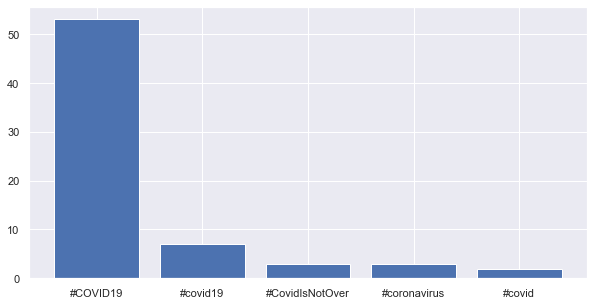

In [88]:
# Create visualisation and set figure size.
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(counts_df_2['Hashtags'], counts_df_2['counts'])

In [6]:
# Explore tweets data set.
print(tweets.info())
print(tweets.shape)
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 15 non-null     int64  
 1   created_at                 15 non-null     object 
 2   id                         15 non-null     int64  
 3   id_str                     15 non-null     int64  
 4   text                       15 non-null     object 
 5   truncated                  15 non-null     bool   
 6   entities                   15 non-null     object 
 7   metadata                   15 non-null     object 
 8   source                     15 non-null     object 
 9   in_reply_to_status_id      0 non-null      float64
 10  in_reply_to_status_id_str  0 non-null      float64
 11  in_reply_to_user_id        0 non-null      float64
 12  in_reply_to_user_id_str    0 non-null      float64
 13  in_reply_to_screen_name    0 non-null      float64
 

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,...,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,0,Sun Mar 13 22:37:31 +0000 2022,1503138212692344832,1503138212692344832,RT @SixandLaura: Detection of a Novel &amp; Hi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",...,False,en,NaN,NaN,NaN,NaN,NaN
1,1,Sun Mar 13 22:36:52 +0000 2022,1503138051052253190,1503138051052253190,"RT @IranNewsUpdate1: #IranProtests\n#Tehran, #...",False,"{'hashtags': [{'text': 'IranProtests', 'indice...",...,False,en,NaN,NaN,NaN,NaN,NaN
2,2,Sun Mar 13 22:35:43 +0000 2022,1503137759002693634,1503137759002693634,Former President Barack #Obama has tested #pos...,True,"{'hashtags': [{'text': 'Obama', 'indices': [24...",...,False,en,False,NaN,NaN,NaN,NaN
3,3,Sun Mar 13 22:34:54 +0000 2022,1503137553632923655,1503137553632923655,RT @OldPrague: - China put all 17 million resi...,False,"{'hashtags': [{'text': 'Schengen', 'indices': ...",...,False,en,NaN,NaN,NaN,NaN,NaN
4,4,Sun Mar 13 22:32:24 +0000 2022,1503136923585589253,1503136923585589253,RT @butterygoods: Sub variant of Omicron BA.2 ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",...,False,en,NaN,NaN,NaN,NaN,NaN


In [7]:
# Exploring potential elemetns of interest for tweets.
tweetscount = tweets[['retweet_count', 'favorite_count']]

print(tweetscount.sort_values('retweet_count', ascending = False))

tweetscount.sort_values('favorite_count', ascending = False)

    retweet_count  favorite_count
7              18               0
11             18               0
4               5               0
3               3               0
0               2               0
1               1               0
13              1               0
2               0               0
5               0               2
6               0               0
8               0               0
9               0               0
10              0               0
12              0               0
14              0               0


,retweet_count,favorite_count
5,0,2
0,2,0
1,1,0
2,0,0
3,3,0
4,5,0
6,0,0
7,18,0
8,0,0
9,0,0


In [8]:
# Rearrange the tweets DataFrame to only include columns with text (objects) values.
tweets_txt = tweets.text

tweets_txt

0     RT @SixandLaura: Detection of a Novel &amp; Hi...
1     RT @IranNewsUpdate1: #IranProtests\n#Tehran, #...
2     Former President Barack #Obama has tested #pos...
3     RT @OldPrague: - China put all 17 million resi...
4     RT @butterygoods: Sub variant of Omicron BA.2 ...
5     Available #vaccines have been designed against...
6     #fact : The CIA has warned the White House sin...
7     RT @CynthiaY29: 6.04 Million people worldwide ...
8     New COVID-19 Data at 2022-03-13 06:30:00 pm ED...
9     #cabletv taking an expensive gamble with ALL-W...
10    QURAN: Prophet Musa (Moses) A.S &amp; 70 Of Hi...
11    RT @CynthiaY29: 6.04 Million people worldwide ...
12    #China’s government has responded to a sharp r...
13    RT @NewBooks4You: A timely masterpiece. The Co...
14    Former president #Barackobama tests positive f...
Name: text, dtype: object

In [12]:
# Create for loop statement to find hashtags in text.
hashtagslist = []
for tweet in tweets_txt:
    hashtags = [i for i in tweet.split() if i.startswith("#")]
    hashtagslist.append(hashtags)
    
hashtagslist

[[],
 ['#IranProtests', '#Tehran,', "#Iran's"],
 ['#Obama', '#positive', '#coronavirus.'],
 ['#Schengen', '#Coronavirus', '#China'],
 [],
 ['#vaccines', '#coronavirus'],
 ['#fact'],
 [],
 ['#Coronavirus', '#COVID19', '#COVID_19'],
 ['#cabletv', '#CORONAVIRUS'],
 ['#theology', '#Islam', '#Quran', '#Christianity', '#Bible…'],
 [],
 ['#China’s', '#coronavirus'],
 [],
 ['#Barackobama', '#Coronavirus']]

In [14]:
# Create a regular list of lists for '#' in text.
flat_hashtagslist = flatten_list(hashtagslist)

flat_hashtagslist

['#IranProtests',
 '#Tehran,',
 "#Iran's",
 '#Obama',
 '#positive',
 '#coronavirus.',
 '#Schengen',
 '#Coronavirus',
 '#China',
 '#vaccines',
 '#coronavirus',
 '#fact',
 '#Coronavirus',
 '#COVID19',
 '#COVID_19',
 '#cabletv',
 '#CORONAVIRUS',
 '#theology',
 '#Islam',
 '#Quran',
 '#Christianity',
 '#Bible…',
 '#China’s',
 '#coronavirus',
 '#Barackobama',
 '#Coronavirus']

In [15]:
# Create a Series.
flathashtags = pd.Series(flat_hashtagslist)

# Count the values in the list.
value_counts = flathashtags.value_counts()

# Display 30 records.
value_counts.head(n = 30)

#Coronavirus     3
#coronavirus     2
#IranProtests    1
#COVID_19        1
#China’s         1
                ..
#coronavirus.    1
#positive        1
#Obama           1
#Iran's          1
#Barackobama     1
Length: 23, dtype: int64

In [19]:
# Convert Series into a DataFrame.
counts_df2 = value_counts.to_frame(name = 'Counts')

# Rename column to 'Hashtags'.
counts_df2 = counts_df2.rename_axis('Hashtags').reset_index()

print(counts_df2.dtypes)
counts_df2

Hashtags    object
Counts       int64
dtype: object


,Hashtags,Counts
0,#Coronavirus,3
1,#coronavirus,2
2,#IranProtests,1
3,#COVID_19,1
4,#China’s,1
...,...,...
18,#coronavirus.,1
19,#positive,1
20,#Obama,1
21,#Iran's,1


In [21]:
# Remove 'counts' values less than and equal 1.
counts_df2 = counts_df2.query('Counts > 1')

counts_df2

,Hashtags,Counts
0,#Coronavirus,3
1,#coronavirus,2


<BarContainer object of 2 artists>

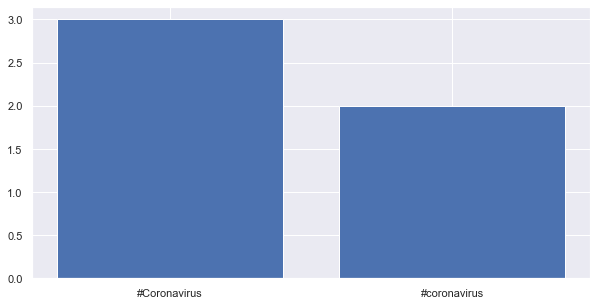

In [22]:
# Create visualisation for tweets data set and set figure size.
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(counts_df2['Hashtags'], counts_df2['Counts'])

## 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. We have covered everything from a data ethics standpoint, correct? There’s nothing else we need to implement from a data ethics perspective, right?

In [53]:
# Read the data set of hospitalisation numbers.
covid_hospitalised = pd.read_csv("covid_19_uk_cases.csv", index_col = ['Date'], parse_dates = ['Date'])

covid_hospitalised

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
Date,,,,,,,,,,,
2020-01-22,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-23,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-24,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-25,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-26,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,137735.0,8154306.0,0.0,378.0
2021-10-11,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,137763.0,8193769.0,0.0,386.0
2021-10-12,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,137944.0,8231437.0,0.0,386.0


In [60]:
# Select rows only relating to 'Channel Islands' and remove irrelevant columns.
covid_channel_islands = covid_hospitalised[covid_hospitalised['Province/State'] == 'Channel Islands']

covid_channel_islands = covid_channel_islands[['Province/State', 'Hospitalised']]

covid_channel_islands

,Province/State,Hospitalised
Date,,
2020-01-22,Channel Islands,0.0
2020-01-23,Channel Islands,0.0
2020-01-24,Channel Islands,0.0
2020-01-25,Channel Islands,0.0
2020-01-26,Channel Islands,0.0
...,...,...
2021-10-10,Channel Islands,481.0
2021-10-11,Channel Islands,491.0
2021-10-12,Channel Islands,491.0


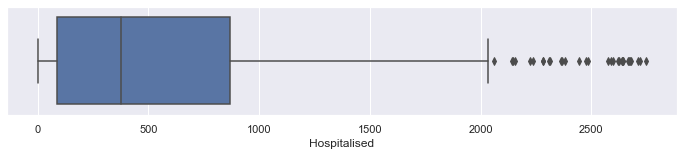

In [56]:
# Determine outliers.
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = covid_channel_islands['Hospitalised'], whis = 1.5)

In [85]:
# outlier removal
# Removing outlier from dataset 'Channel Islands' : 
cols = ['Hospitalised']

# Calculate quantiles and IQR
Q1 = covid_channel_islands[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = covid_channel_islands[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((covid_channel_islands[cols] < (Q1 - 1.5 * IQR)) | \
              (covid_channel_islands[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our dataframe based on condition
ci_non_outlier = covid_channel_islands[condition]
ci_non_outlier.shape

Hospitalised    778.25
dtype: float64

(600, 2)

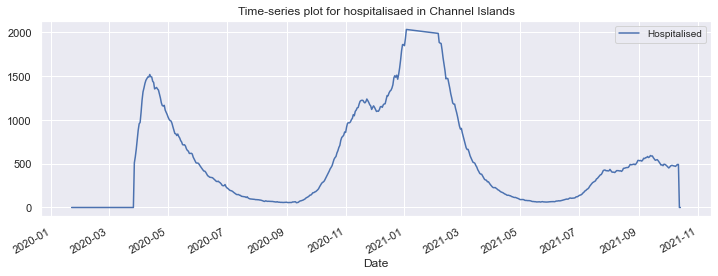

In [86]:
# Plotting the time series data.
ci_non_outlier.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time-series plot for hospitalisaed in Channel Islands')
plt.show(block = False);

In [87]:
# Resampling dataset: 
ci_res = ci_non_outlier.resample('M').mean()

# view DataFrame
ci_res

,Hospitalised
Date,
2020-01-31,0.000000
2020-02-29,0.000000
2020-03-31,110.129032
2020-04-30,1295.766667
2020-05-31,748.193548
...,...
2021-06-30,89.700000
2021-07-31,287.419355
2021-08-31,448.548387


In [88]:
# Dropping the missing values : 
ci_res.dropna(inplace = True)
ci_res.isna().sum()

Hospitalised    0
dtype: int64

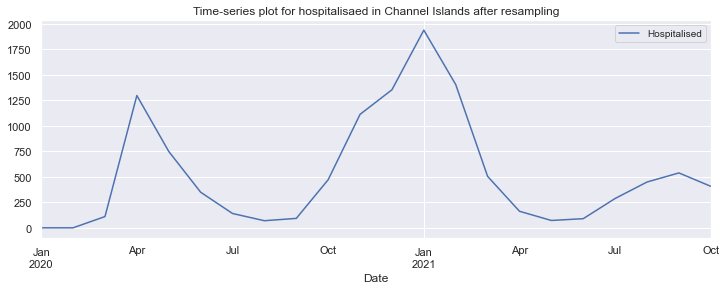

In [89]:
# Plotting the time series data again.
ci_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time-series plot for hospitalisaed in Channel Islands after resampling')
plt.show(block = False);

In [90]:
# This is a function to calculate and plot the simple moving average : 
def plot_moving_average(series, window, plot_intervals = False, scale = 1.96):

    rolling_mean = series.rolling(window = window).mean()
    
    plt.figure(figsize = (18, 4))
    plt.title('Moving Average\n Window Size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label = 'Simple Moving Average (SMA) Trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label = 'Upper Bound / Lower Bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label = 'Actual Values')
    plt.legend(loc = 'best')
    plt.grid(True)

In [91]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

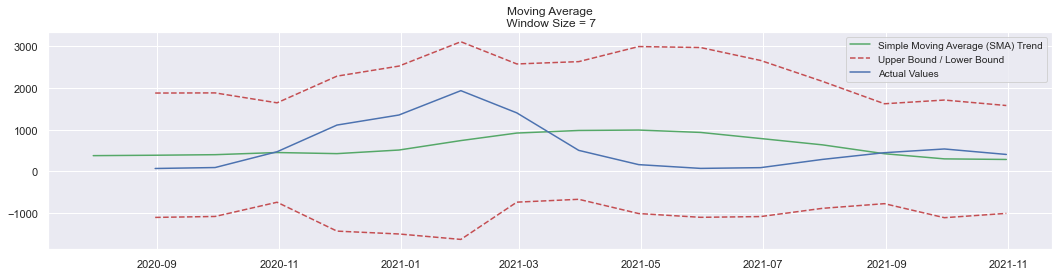

In [92]:
# Plot SMA by 7 days.
plot_moving_average(ci_res.Hospitalised, 7, plot_intervals = True)

plt.rc('legend', fontsize = 10)

In [93]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = ci_res.copy()
s_rolling = s['Hospitalised'].rolling(window = 7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending = False).head(3)

,Hospitalised,error
Date,,
2021-01-31,1936.000000,1197.066820
2021-05-31,71.870968,862.480376
2020-12-31,1352.129032,839.929186
